<a href="https://colab.research.google.com/github/trajinthan/pump-it-up-data-mining/blob/main/pumb_it_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load data**

Import necessary libraries and models

In [549]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# from catboost import CatBoostClassifier
# from xgboost import XGBClassifier

from typing import Dict, Tuple

Load data 

In [481]:
train_label = pd.read_csv('TrainLabel.csv')
train_value = pd.read_csv('TrainValue.csv') 
test_value = pd.read_csv('TestData.csv')

Merge training data values and respective training data labels

In [482]:
train_data = train_value.merge(train_label, on='id')

# **Exploratory Data Analysis**


In [483]:
train_data.head().T

,0,1,2,3,4
id,69572,8776,34310,67743,19728
amount_tsh,6000,0,25,0,0
date_recorded,2011-03-14,2013-03-06,2013-02-25,2013-01-28,2011-07-13
funder,Roman,Grumeti,Lottery Club,Unicef,Action In A
gps_height,1390,1399,686,263,0
installer,Roman,GRUMETI,World vision,UNICEF,Artisan
longitude,34.9381,34.6988,37.4607,38.4862,31.1308
latitude,-9.85632,-2.14747,-3.82133,-11.1553,-1.82536
wpt_name,none,Zahanati,Kwa Mahundi,Zahanati Ya Nanyumbu,Shuleni
num_private,0,0,0,0,0


Get the data types of the values

In [484]:
train_data.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

Get the count of each classes in training data

In [485]:
train_data['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

**Analyze similar features**

1. The features **quantity** and **quantity_group** are described as **The quantity of water** So we need to check whether they are same in or not

In [486]:
train_data['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [487]:
train_data['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [488]:
train_data.groupby(['quantity','quantity_group']).count()

,,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
quantity,quantity_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
dry,dry,6246,6246,6246,5781,6246,5782,6246,6246,6246,6246,6246,6087,6246,6246,6246,6246,6246,6246,5786,6246,5974,3546,5836,6246,6246,6246,6246,6246,6246,6246,6246,6246,6246,6246,6246,6246,6246,6246,6246
enough,enough,33186,33186,33186,31963,33186,31964,33186,33186,33186,33186,33186,33087,33186,33186,33186,33186,33186,33186,31366,33186,31610,18363,31979,33186,33186,33186,33186,33186,33186,33186,33186,33186,33186,33186,33186,33186,33186,33186,33186
insufficient,insufficient,15129,15129,15129,13950,15129,13940,15129,15129,15129,15129,15129,15020,15129,15129,15129,15129,15129,15129,14569,15129,13710,8053,13934,15129,15129,15129,15129,15129,15129,15129,15129,15129,15129,15129,15129,15129,15129,15129,15129
seasonal,seasonal,4050,4050,4050,3414,4050,3415,4050,4050,4050,4050,4050,4046,4050,4050,4050,4050,4050,4050,3872,4050,3740,932,3901,4050,4050,4050,4050,4050,4050,4050,4050,4050,4050,4050,4050,4050,4050,4050,4050
unknown,unknown,789,789,789,657,789,644,789,789,789,789,789,789,789,789,789,789,789,789,473,789,489,340,694,789,789,789,789,789,789,789,789,789,789,789,789,789,789,789,789


As both features carry identical values we can drop either **quantity** or **quantity_group**.

2. The features **water_quality** and **quality_group** are described as **The quality of the water** So we need to check whether they are same in or not.

In [489]:
train_data['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [490]:
train_data['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [491]:
train_data.groupby(['water_quality','quality_group']).count()

,,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
water_quality,quality_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
coloured,colored,490,490,490,391,490,391,490,490,490,490,490,490,490,490,490,490,490,490,478,490,431,123,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490
fluoride,fluoride,200,200,200,181,200,176,200,200,200,200,200,200,200,200,200,200,200,200,197,200,188,138,186,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
fluoride abandoned,fluoride,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,16,17,14,1,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
milky,milky,804,804,804,788,804,785,804,804,804,804,804,804,804,804,804,804,804,804,736,804,344,44,801,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804,804
salty,salty,4856,4856,4856,4803,4856,4801,4856,4856,4856,4856,4856,4638,4856,4856,4856,4856,4856,4856,4485,4856,4419,1453,4706,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856,4856
salty abandoned,salty,339,339,339,331,339,331,339,339,339,339,339,338,339,339,339,339,339,339,239,339,332,62,329,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339,339
soft,good,50818,50818,50818,47945,50818,47948,50818,50818,50818,50818,50818,50666,50818,50818,50818,50818,50818,50818,48437,50818,48262,28629,48416,50818,50818,50818,50818,50818,50818,50818,50818,50818,50818,50818,50818,50818,50818,50818,50818
unknown,unknown,1876,1876,1876,1309,1876,1296,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1478,1876,1533,784,1399,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876,1876


As both features have almost same values we can drop either one of them. **water_quality** is more informative.

3. The features **payment** and **payment_type** are described as **What the water costs** So we need to check whether they are same in or not.

In [492]:
train_data['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [493]:
train_data['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [494]:
train_data.groupby(['payment','payment_type']).count()

,,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
payment,payment_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
never pay,never pay,25348,25348,25348,23440,25348,23443,25348,25348,25348,25348,25348,25246,25348,25348,25348,25348,25348,25348,24594,25348,23604,11385,23776,25348,25348,25348,25348,25348,25348,25348,25348,25348,25348,25348,25348,25348,25348,25348,25348
other,other,1054,1054,1054,1038,1054,1039,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,977,1054,1028,220,995,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054,1054
pay annually,annually,3642,3642,3642,3533,3642,3529,3642,3642,3642,3642,3642,3591,3642,3642,3642,3642,3642,3642,3626,3642,3604,2355,3585,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642,3642
pay monthly,monthly,8300,8300,8300,8084,8300,8083,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8226,8300,7877,5970,8221,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300,8300
pay per bucket,per bucket,8985,8985,8985,8717,8985,8711,8985,8985,8985,8985,8985,8767,8985,8985,8985,8985,8985,8985,8552,8985,8816,6707,8700,8985,8985,8985,8985,8985,8985,8985,8985,8985,8985,8985,8985,8985,8985,8985,8985
pay when scheme fails,on failure,3914,3914,3914,3869,3914,3872,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3896,3914,3793,1264,3777,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914,3914
unknown,unknown,8157,8157,8157,7084,8157,7068,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,6195,8157,6801,3333,7290,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157,8157


As both features carry identical values we can drop either **payment** or **payment_type**.

4. The features **waterpoint_type** and **waterpoint_type_group** are described as **The kind of waterpoint** So we need to check whether they are same in or not.

In [495]:
train_data['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [496]:
train_data['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [497]:
train_data.groupby(['waterpoint_type','waterpoint_type_group']).count()

,,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,status_group
waterpoint_type,waterpoint_type_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cattle trough,cattle trough,116,116,116,113,116,110,116,116,116,116,116,116,116,116,116,116,116,116,114,116,113,71,88,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116
communal standpipe,communal standpipe,28522,28522,28522,25778,28522,25790,28522,28522,28522,28522,28522,28407,28522,28522,28522,28522,28522,28522,27196,28522,28030,23049,26368,28522,28522,28522,28522,28522,28522,28522,28522,28522,28522,28522,28522,28522,28522,28522,28522
communal standpipe multiple,communal standpipe,6103,6103,6103,6064,6103,6063,6103,6103,6103,6103,6103,5859,6103,6103,6103,6103,6103,6103,5815,6103,6032,5218,6051,6103,6103,6103,6103,6103,6103,6103,6103,6103,6103,6103,6103,6103,6103,6103,6103
dam,dam,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,5,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
hand pump,hand pump,17488,17488,17488,16997,17488,16977,17488,17488,17488,17488,17488,17485,17488,17488,17488,17488,17488,17488,16255,17488,15368,1468,16978,17488,17488,17488,17488,17488,17488,17488,17488,17488,17488,17488,17488,17488,17488,17488,17488
improved spring,improved spring,784,784,784,743,784,748,784,784,784,784,784,784,784,784,784,784,784,784,773,784,701,83,780,784,784,784,784,784,784,784,784,784,784,784,784,784,784,784,784
other,other,6380,6380,6380,6063,6380,6050,6380,6380,6380,6380,6380,6371,6380,6380,6380,6380,6380,6380,5906,6380,5272,1340,6073,6380,6380,6380,6380,6380,6380,6380,6380,6380,6380,6380,6380,6380,6380,6380,6380


As both features have almost same values we can drop either one of them. **waterpoint_type** is more informative.

5. The features **source** , **source_type** and **source_group** are described as **The source of the water** So we need to check whether they are same in or not.

In [498]:
train_data['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [499]:
train_data['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [500]:
train_data['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [501]:
train_data.groupby(['source_class','source_type','source']).count()

id  ...  status_group
source_class source_type          source                       ...              
groundwater  borehole             hand dtw                874  ...           874
                                  machine dbh           11075  ...         11075
             shallow well         shallow well          16824  ...         16824
             spring               spring                17021  ...         17021
surface      dam                  dam                     656  ...           656
             rainwater harvesting rainwater harvesting   2295  ...          2295
             river/lake           lake                    765  ...           765
                                  river                  9612  ...          9612
unknown      other                other                   212  ...           212
                                  unknown                  66  ...            66

[10 rows x 38 columns]

 As **source_class** and **source_type** are super sets of **source**, we can drop **source_class** and **source_type**. **source** is more informative feature among them.

6. The features **management** and **management_group** are described as **How the waterpoint is managed** So we need to check whether they are same in or not.

In [502]:
train_data['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [503]:
train_data['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [504]:
train_data.groupby(['management_group','management']).count()

id  ...  status_group
management_group management               ...              
commercial       company             685  ...           685
                 private operator   1971  ...          1971
                 trust                78  ...            78
                 water authority     904  ...           904
other            other               844  ...           844
                 other - school       99  ...            99
parastatal       parastatal         1768  ...          1768
unknown          unknown             561  ...           561
user-group       vwc               40507  ...         40507
                 water board        2933  ...          2933
                 wua                2535  ...          2535
                 wug                6515  ...          6515

[12 rows x 39 columns]

**management** and **management_group** contains same information and management is more detailed. so **management_group** can be dropped

7. The features **extraction_type** , **extraction_type_class** and **extraction_type_group** are described as **The kind of extraction the waterpoint uses** So we need to check whether they are same in or not.

In [505]:
train_data['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [506]:
train_data['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [507]:
train_data['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [508]:
train_data.groupby(['extraction_type_class','extraction_type_group','extraction_type']).count()

id  ...  status_group
extraction_type_class extraction_type_group extraction_type                   ...              
gravity               gravity               gravity                    26780  ...         26780
handpump              afridev               afridev                     1770  ...          1770
                      india mark ii         india mark ii               2400  ...          2400
                      india mark iii        india mark iii                98  ...            98
                      nira/tanira           nira/tanira                 8154  ...          8154
                      other handpump        other - mkulima/shinyanga      2  ...             2
                                            other - play pump             85  ...            85
                                            other - swn 81               229  ...           229
                                            walimi                        48  ...            48
                      swn 80                swn 80                      3670  ...          3670
motorpump             mono                  mono                        2865  ...          2865
                      other motorpump       cemo                          90  ...            90
                                            climax                        32  ...            32
other                 other                 other                       6430  ...          6430
rope pump             rope pump             other - rope pump            451  ...           451
submersible           submersible           ksb                         1415  ...          1415
                                            submersible                 4764  ...          4764
wind-powered          wind-powered          windmill                     117  ...           117

[18 rows x 38 columns]

As **extraction_type** contains unique information we can drop **extraction_type_group** and **extraction_type_class**	

8. The features **scheme_management** and **scheme_name** are described as **Who operates the waterpoint** So we need to check whether they are same in or not.

In [509]:
train_data['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [510]:
train_data['scheme_name'].value_counts()

K                              682
None                           644
Borehole                       546
Chalinze wate                  405
M                              400
                              ... 
TM Naibile part three            1
Kala                             1
NYA/ MAK/ BUK piped  scheme      1
Wisu                             1
Nyasembe                         1
Name: scheme_name, Length: 2696, dtype: int64

In [511]:
train_data.groupby(['scheme_management','scheme_name']).count()

id  ...  status_group
scheme_management scheme_name                     ...              
Company           BFFS                         1  ...             1
                  Bagamoyo Wate               60  ...            60
                  Bagamoyo wate              210  ...           210
                  Borehole                     1  ...             1
                  Borehole drilling project    1  ...             1
...                                          ...  ...           ...
Water authority   Yongoma                     16  ...            16
                  Zepalama                     5  ...             5
                  no scheme                    9  ...             9
                  pump                         2  ...             2
                  water supply at Kalebejo     1  ...             1

[3077 rows x 39 columns]

9. Check correlation between  **region** and **region_code**

In [512]:
train_data['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [513]:
train_data['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [514]:
train_data.groupby(['region','region_code']).count()

id  ...  status_group
region        region_code        ...              
Arusha        2            3024  ...          3024
              24            326  ...           326
Dar es Salaam 7             805  ...           805
Dodoma        1            2201  ...          2201
Iringa        11           5294  ...          5294
Kagera        18           3316  ...          3316
Kigoma        16           2816  ...          2816
Kilimanjaro   3            4379  ...          4379
Lindi         8             300  ...           300
              18              8  ...             8
              80           1238  ...          1238
Manyara       21           1583  ...          1583
Mara          20           1969  ...          1969
Mbeya         12           4639  ...          4639
Morogoro      5            4006  ...          4006
Mtwara        9             390  ...           390
              90            917  ...           917
              99            423  ...           423
Mwanza        17             55  ...            55
              19           3047  ...          3047
Pwani         6            1609  ...          1609
              40              1  ...             1
              60           1025  ...          1025
Rukwa         15           1808  ...          1808
Ruvuma        10           2640  ...          2640
Shinyanga     11              6  ...             6
              14             20  ...            20
              17           4956  ...          4956
Singida       13           2093  ...          2093
Tabora        14           1959  ...          1959
Tanga         4            2513  ...          2513
              5              34  ...            34

[32 rows x 39 columns]

10. The feature **recorded_by** can be dropped as it has only one distinct value

In [515]:
train_data['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

# **Pre Processing, Feature Engineering, Feature Extraction**

1. Extract year and month from **date_recorded** and create new columns **date_recorded_month** and **date_recorded_month**

In [516]:
train_data["date_recorded"] = pd.to_datetime(train_data['date_recorded'])
train_data['date_recorded_month'] = train_data['date_recorded'].dt.month
train_data['date_recorded_year'] = train_data['date_recorded'].dt.year

test_value["date_recorded"] = pd.to_datetime(test_value['date_recorded'])
test_value['date_recorded_month'] = test_value['date_recorded'].dt.month
test_value['date_recorded_year'] = test_value['date_recorded'].dt.year

2. Drop similar and unnecessary columns

In [517]:
def drop_columns(dataset: pd.DataFrame):
  drop_columns=['management_group','scheme_management',
                'quantity_group','source_class',
                'source_type','recorded_by','quality_group',
                'payment_type','extraction_type_class',
                'extraction_type', 'waterpoint_type_group',
                'region_code', 'amount_tsh',
                'num_private','date_recorded'
               ]
  dataset.drop(drop_columns,1, inplace=True)

In [518]:
drop_columns(train_data)
drop_columns(test_value)

3. **Handling Null Vaues**

Get the count of null values  in each features 

In [519]:
train_data.isnull().sum()

id                           0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
basin                        0
subvillage                 371
region                       0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
scheme_name              28166
permit                    3056
construction_year            0
extraction_type_group        0
management                   0
payment                      0
water_quality                0
quantity                     0
source                       0
waterpoint_type              0
status_group                 0
date_recorded_month          0
date_recorded_year           0
dtype: int64

Analyzing the data values of the features which have missinng values

In [520]:
train_data['funder'].value_counts().head(20)

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
0                          777
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Name: funder, dtype: int64

In [521]:
train_data['installer'].value_counts().head(20)

DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
CES                     610
Community               553
DANID                   552
District Council        551
HESAWA                  539
LGA                     408
World vision            408
WEDECO                  397
TASAF                   396
District council        392
Name: installer, dtype: int64

In [522]:
train_data['scheme_name'].value_counts().head(20)

K                                        682
None                                     644
Borehole                                 546
Chalinze wate                            405
M                                        400
DANIDA                                   379
Government                               320
Ngana water supplied scheme              270
wanging'ombe water supply s              261
wanging'ombe supply scheme               234
I                                        229
Bagamoyo wate                            229
Uroki-Bomang'ombe water sup              209
N                                        204
Kirua kahe gravity water supply trust    193
Machumba estate pipe line                185
Makwale water supplied sche              166
Kijiji                                   161
S                                        154
Losaa-Kia water supply                   152
Name: scheme_name, dtype: int64

missing values in **funder** ,**installer** and **scheme_name** can be filled as **n/a**

In [523]:
train_data['public_meeting'].value_counts().head(20)

True     51011
False     5055
Name: public_meeting, dtype: int64

In [524]:
train_data['permit'].value_counts().head(20)

True     38852
False    17492
Name: permit, dtype: int64

**public_meeting** and **permit** have nearly 3000 null values and they have value **true** in very high number compared to **false**. so we can fill null values of those features with **true**

Definition for replacing missing values

In [525]:
def replace_null_value(dataset: pd.DataFrame):
    for column in ['funder','installer','scheme_name','subvillage']:
        dataset[column] = dataset[column].fillna('n/a')
    for column in ['permit','public_meeting']:
        dataset[column] = dataset[column].fillna('true')
    dataset['longitude'] = dataset['longitude'].replace(0, dataset['longitude'].mean())

In [526]:
replace_null_value(train_data)
replace_null_value(test_value)

4. **Encoding categorical columns**

In [527]:
train_data['permit'] = train_data['permit'].astype(bool).astype(int)
test_value['permit'] = test_value['permit'].astype(bool).astype(int)

In [528]:
train_data['public_meeting'] = train_data['public_meeting'].astype(bool).astype(int)
test_value['public_meeting'] = test_value['public_meeting'].astype(bool).astype(int)

In [529]:
cat_cols = train_data.select_dtypes('object').columns

In [530]:
def encode_categorical_columns(dataset: pd.DataFrame) -> Dict[str, LabelEncoder]:
    encoders = {} 
    for column in cat_cols:
      if column not in dataset.columns:
        continue

      le = LabelEncoder()
      le.fit(dataset[column])

      dataset[column] = le.transform(dataset[column])
      encoders[column]= le
        
    return encoders

In [531]:
encoders = encode_categorical_columns(train_data)
encode_categorical_columns(test_value)

{'basin': LabelEncoder(),
 'extraction_type_group': LabelEncoder(),
 'funder': LabelEncoder(),
 'installer': LabelEncoder(),
 'lga': LabelEncoder(),
 'management': LabelEncoder(),
 'payment': LabelEncoder(),
 'quantity': LabelEncoder(),
 'region': LabelEncoder(),
 'scheme_name': LabelEncoder(),
 'source': LabelEncoder(),
 'subvillage': LabelEncoder(),
 'ward': LabelEncoder(),
 'water_quality': LabelEncoder(),
 'waterpoint_type': LabelEncoder(),
 'wpt_name': LabelEncoder()}

5. **Scale columns**

In [532]:
def scale_columns(dataset: pd.DataFrame):
    scaler = StandardScaler()
    dataset = scaler.fit_transform(dataset)

In [533]:
scale_columns(train_data)
scale_columns(test_value)

**Split data**

In [534]:
X=train_data.drop(['id','status_group'],1)
y = train_data['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# **Model Training & Selection**

In [550]:
def plot_features_importances(classifier, X_train):
    series = pd.Series(classifier.feature_importances_, index=X_train.columns).sort_values(ascending=True)
    series = series.plot(kind='barh', figsize=(10,10))
    plt.xlabel('Feature importance')
    plt.ylabel('Features')
    plt.show()

 **CatBoostClassifier**

In [535]:
# model= CatBoostClassifier(
#         learning_rate = 0.39730054363848666,
#         # n_estimators=1000,
#         subsample=0.075,
#         max_depth=5,
#         l2_leaf_reg = 40,
#         verbose=100,
#         bootstrap_type="Bernoulli"
#         # auto_class_weights="SqrtBalanced",
#         # loss_function='MultiClass'
#         )

**XGBoost Classifier**

In [536]:
# model = XGBClassifier(nthread=2, num_class=3, 
#                         min_child_weight=3, max_depth=15,
#                         gamma=0.5, scale_pos_weight=0.8,
#                         subsample=0.7, colsample_bytree = 0.8,
#                         objective='multi:softmax')

**RandomForest Classifier**

In [537]:
model = RandomForestClassifier(max_depth=25,
                               n_estimators = 42*5, 
                               criterion = 'entropy',
                               random_state = 0)

In [538]:
model.fit(X_train,y_train)
print(model.score(X_test, y_test))

0.8202020202020202


Find f1 score

In [539]:
train_pred = model.predict(X_test)
f1_score(train_pred, y_test,average = 'macro')

0.7098215760985463

In [540]:

print(classification_report(y_test, train_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      3197
           1       0.60      0.36      0.45       425
           2       0.87      0.79      0.83      2318

    accuracy                           0.82      5940
   macro avg       0.76      0.68      0.71      5940
weighted avg       0.82      0.82      0.81      5940



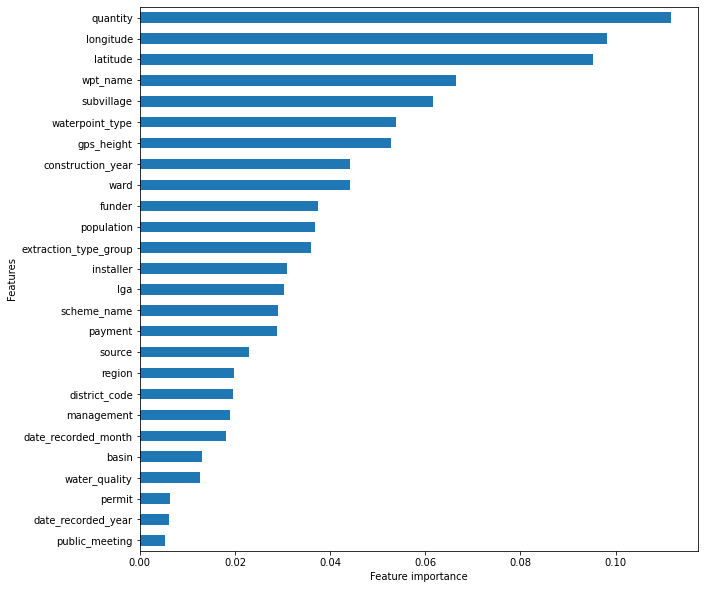

In [551]:
plot_features_importances(model, X_train)

Parameter tuning for random forest classifier

In [541]:
# random_grid = {
# 'bootstrap': [True],
# 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
# 'max_features': ['auto', 'sqrt'],
# 'min_samples_leaf': [1, 2, 4],
# 'min_samples_split': [2, 5, 10],
# 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
# }

# rf = RandomForestRegressor() 
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# rf_random.fit(X_train, y_train) 

In [542]:
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [20,25,30],
#     'min_samples_leaf': [6,7,8,9],
#     'n_estimators': [100, 200, 300, 500]
# }
# rf = RandomForestRegressor()
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
# grid_search.fit(X_train,y_train)
# grid_search.best_params_

# **Prediction of labels for test values**
(*please change split test size to 0.00000001*)

In [543]:
id = test_value['id']
test_value = test_value.drop('id',1)

Predict labels using trained model

In [544]:
label_pred = model.predict(test_value)

Decode **status_group** from [0,1,2] to [functional, functional needs repair, non functional]

In [545]:
status_group_encoder = encoders['status_group']

In [546]:
decoded_label = pd.DataFrame(status_group_encoder.inverse_transform(label_pred), columns = ['status_group'])

In [547]:
result = pd.concat([id, decoded_label], axis=1)

Write results as a csv file

In [548]:
result.to_csv("submisssion.csv", index=False)